In [10]:
from s3ts.data.acquisition import download_dataset
from sklearn.model_selection import StratifiedKFold, train_test_split
from s3ts.experiments.common import prepare_dm
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

GunPoint: 200 samples, 2 classes
  class 0: 100 samples
  class 1: 100 samples
ECG200: 200 samples, 2 classes
  class 0: 67 samples
  class 1: 133 samples
Coffee: 56 samples, 2 classes
  class 0: 29 samples
  class 1: 27 samples
Plane: 210 samples, 7 classes
  class 0: 30 samples
  class 1: 30 samples
  class 2: 30 samples
  class 3: 30 samples
  class 4: 30 samples
  class 5: 30 samples
  class 6: 30 samples
Trace: 200 samples, 4 classes
  class 0: 50 samples
  class 1: 50 samples
  class 2: 50 samples
  class 3: 50 samples
PowerCons: 360 samples, 2 classes
  class 0: 180 samples
  class 1: 180 samples
SyntheticControl: 600 samples, 6 classes
  class 0: 100 samples
  class 1: 100 samples
  class 2: 100 samples
  class 3: 100 samples
  class 4: 100 samples
  class 5: 100 samples
Chinatown: 363 samples, 2 classes
  class 0: 104 samples
  class 1: 259 samples


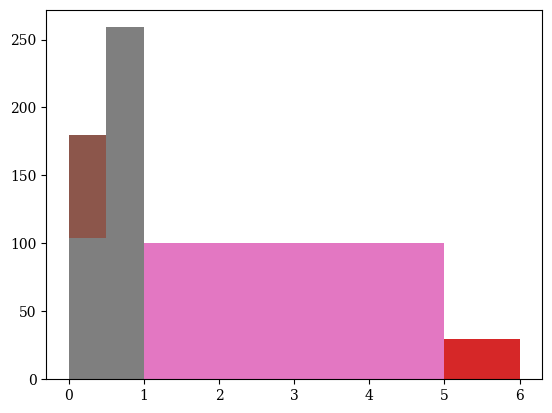

In [32]:
# explore dataset properties

dir_cache = Path("cache")
DATASETS = ["GunPoint", "ECG200", "Coffee", "Plane", "Trace", "PowerCons", "SyntheticControl", "Chinatown"]
#DATASETS = ["ECG200", "Coffee", "Plane", "Trace", "PowerCons"]

for dataset in DATASETS:
    X, Y = download_dataset(dataset_name=dataset, dir_cache=dir_cache)

    # print the number of samples and classes
    print(f"{dataset}: {X.shape[0]} samples, {len(np.unique(Y))} classes")

    # print the number of samples per class
    for c in np.unique(Y):
        print(f"  class {c}: {np.sum(Y==c)} samples")

    # plot the distribution of the classes
    plt.hist(Y, bins=len(np.unique(Y)))
    

In [12]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

In [49]:
# setup to recreate the folds used in the experiments

dataset = "Coffee"
random_state = 0
fold, total_folds = 0, 5
dir_cache=Path("../cache/")

X, Y = download_dataset(dataset_name=dataset, dir_cache=dir_cache)
#X, _, Y, _ = train_test_split(X, Y, stratify=Y, test_size=0.9, random_state=0)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
for j, (train_index, test_index) in enumerate(skf.split(X, Y)):
  if j == fold:
    X_train, Y_train = X[train_index,:], Y[train_index]
    X_test, Y_test = X[test_index,:], Y[test_index]

train_dm, pretrain_dm = prepare_dm(dataset=dataset,
  X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test,
  batch_size=128, window_length=5, window_stride=1, rho_dfs=0.1, pret_frac=1 - 1/(total_folds-1), 
  quant_shifts=[0], quant_intervals=5, fold_number=fold, 
  random_state=random_state, frames=True, dir_cache=dir_cache)

In [50]:
train_dm.ds_train[1]

(tensor([[[-2.0130, -2.0003, -1.9872, -1.9741, -1.9614],
          [-2.0123, -1.9996, -1.9865, -1.9734, -1.9607],
          [-2.0122, -1.9994, -1.9863, -1.9733, -1.9605],
          ...,
          [ 4.9169,  4.8612,  4.8057,  4.7508,  4.6966],
          [ 4.9395,  4.8837,  4.8280,  4.7729,  4.7186],
          [ 4.9622,  4.9062,  4.8503,  4.7950,  4.7405]],
 
         [[-2.0417, -2.0302, -2.0183, -2.0065, -1.9950],
          [-2.0405, -2.0290, -2.0171, -2.0053, -1.9937],
          [-2.0385, -2.0270, -2.0151, -2.0033, -1.9917],
          ...,
          [ 5.0539,  4.9972,  4.9405,  4.8846,  4.8294],
          [ 5.0792,  5.0223,  4.9654,  4.9093,  4.8539],
          [ 5.1045,  5.0474,  4.9903,  4.9340,  4.8785]]]),
 tensor([-1.0012, -1.0049, -1.0237, -1.0231, -1.0167]),
 tensor([1, 0]))

In [51]:
pretrain_dm.DFS_train

tensor([[[1.3129e-01, 2.5363e-01, 3.5474e-01,  ..., 1.4037e+02,
          1.4069e+02, 1.4101e+02],
         [2.8699e-01, 2.7803e-01, 3.7915e-01,  ..., 1.3954e+02,
          1.3989e+02, 1.4024e+02],
         [4.2527e-01, 4.0841e-01, 3.8594e-01,  ..., 1.3891e+02,
          1.3925e+02, 1.3959e+02],
         ...,
         [2.9081e+02, 2.8849e+02, 2.8623e+02,  ..., 2.1124e+01,
          2.1120e+01, 2.1117e+01],
         [2.9196e+02, 2.8963e+02, 2.8736e+02,  ..., 2.1094e+01,
          2.1088e+01, 2.1084e+01],
         [2.9311e+02, 2.9078e+02, 2.8849e+02,  ..., 2.1080e+01,
          2.1074e+01, 2.1069e+01]],

        [[8.6432e-02, 1.6427e-01, 2.2124e-01,  ..., 1.4180e+02,
          1.4206e+02, 1.4232e+02],
         [2.1631e-01, 2.0771e-01, 2.6469e-01,  ..., 1.4029e+02,
          1.4061e+02, 1.4093e+02],
         [3.7230e-01, 3.5580e-01, 3.3389e-01,  ..., 1.3940e+02,
          1.3975e+02, 1.4010e+02],
         ...,
         [2.9813e+02, 2.9576e+02, 2.9344e+02,  ..., 1.7577e+01,
          1.750

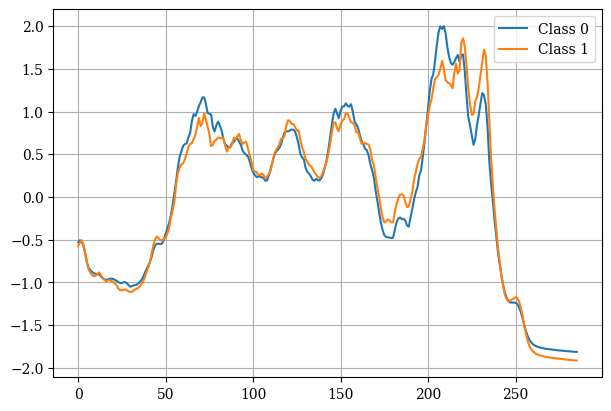

In [52]:
plt.figure(figsize=(6,4), layout="constrained")
for i in range(train_dm.patterns.shape[0]):
    plt.plot(train_dm.patterns[i], label=f"Class {i}")
plt.grid(True)
plt.legend();

26


/tmp/ipykernel_36023/761194953.py:23: RuntimeWarning: overflow encountered in exp
  exp_func = lambda t,a,b: a*np.exp(-b*t)


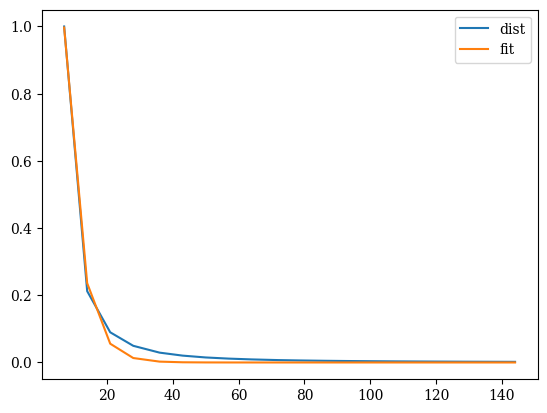

In [39]:
from sktime.distances import dtw_distance
from scipy.interpolate import splev, splrep

pattern = 1

dist = []
samples = np.linspace(train_dm.patterns.shape[1]/20, train_dm.patterns.shape[1], 20, dtype=int)
for i in samples:
    x = np.arange(train_dm.patterns.shape[1])
    series = train_dm.patterns[pattern].numpy()

    spl = splrep(x, series)

    x_comp = np.linspace(0,train_dm.patterns.shape[1], num=i)
    series_comp = splev(x_comp, spl)
    dist.append(dtw_distance(x, x_comp))
dist = np.array(dist)
dist = dist/dist.max()
plt.plot(samples, dist, label="dist")

from scipy.optimize import curve_fit

exp_func = lambda t,a,b: a*np.exp(-b*t)
popt, pcov = curve_fit(exp_func, samples, dist)

plt.plot(samples, exp_func(samples, *popt), label="fit")
plt.legend()
optimal = int(8*np.log(2)/popt[1])
print(optimal)

398.1696


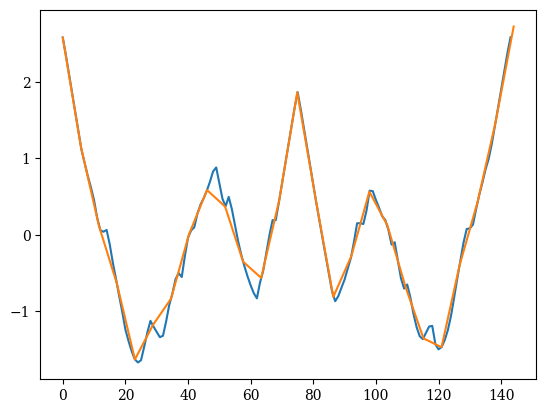

In [40]:
x = np.arange(train_dm.patterns.shape[1])
series = train_dm.patterns[pattern].numpy()

spl = splrep(x, series)

x_comp = np.linspace(0,train_dm.patterns.shape[1], num=optimal)
series_comp = splev(x_comp, spl)

plt.plot(x, series)
plt.plot(x_comp, series_comp)
print(dtw_distance(x, x_comp))

In [9]:
def smooth_STS(
        STS: np.ndarray,
        n_sample: int,
        l_sample: int,
        ) -> np.ndarray:

    STS = pd.Series(STS)
    XD = pd.Series(STS).rolling(5).mean()

    positions = np.arange(0,n_sample)*l_sample
    #print(positions)

    spacing = int(l_sample/10)
    
    for idx in positions[1:]:

        # moving averages
        


        # # using splinesss
        # idx_range = [
        #     idx-spacing,
        #     idx-spacing+1, 
        #     idx+spacing-2,
        #     idx+spacing-1,
        #     ]
        # series = [
        #     XD.iloc[idx-spacing],
        #     XD.iloc[idx-spacing+1],
        #     XD.iloc[idx+spacing-2],
        #     XD.iloc[idx+spacing-1]
        #     ]
        # spl = splrep(idx_range, series)
        # idx_range = np.arange(idx-spacing, idx+spacing)
        # STS.iloc[idx-spacing:idx+spacing] = splev(idx_range, spl)


        pass


    return STS.values

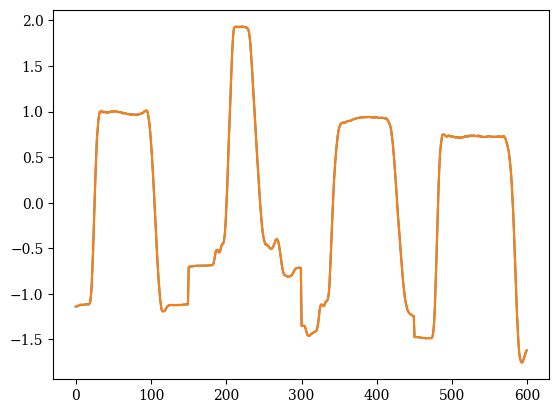

In [10]:
dm = pretrain_dm
TS = dm.STS_train
LP = dm.l_patterns
NS = int(dm.STS_train.shape[0]/LP)

samples = 4

plt.plot(TS[0:samples*LP])
plt.plot(smooth_STS(TS, NS, LP)[0:samples*LP])

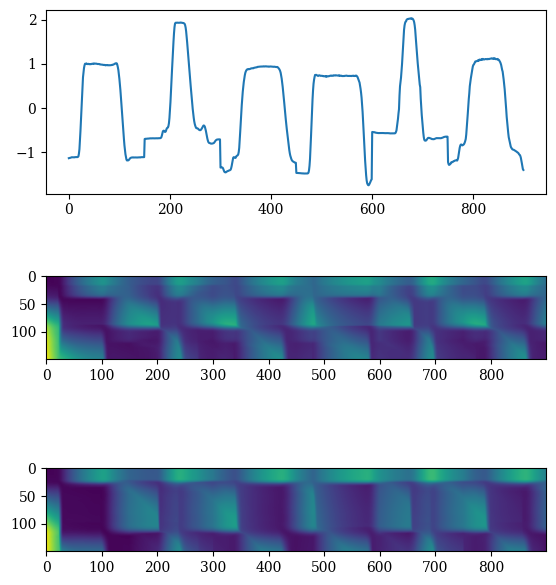

In [11]:
dm = pretrain_dm

TS = dm.STS_train
DFS = dm.DFS_train
CLS = dm.labels_train.argmax(dim=1)
NCLS = dm.n_labels
LP = dm.l_patterns
NP = dm.n_patterns

samples = 6

fig = plt.figure(figsize=(6, 2*(NP+1)), dpi=100, layout="constrained")
gs = fig.add_gridspec(nrows=NP+1, ncols=2,
    hspace=0, height_ratios=None,
    wspace=0, width_ratios=[0.1, 0.9])

axes = {}

axes["TS"] = fig.add_subplot(gs[0,1])
axes["TS"].plot(TS[0:samples*LP])

for i in range(NP):
    axes[i] = fig.add_subplot(gs[i+1,1])
    axes[i].imshow(DFS[i,:,0:samples*LP])


In [12]:
NCLS

5